In [16]:
from datetime import datetime
import xarray as xr
import numpy as np
from matplotlib.dates import num2date,date2num
from datetime import datetime,timedelta
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import requests
from matplotlib.gridspec import GridSpec
%matplotlib inline

# Let's get data ^_^

In [2]:
url ='ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2/sst.mnmean.nc'
!wget $url

--2021-01-21 14:51:11--  ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2/sst.mnmean.nc
           => 'sst.mnmean.nc.1'
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... ^C


# Reading and looking at what's in a dataset

In [6]:
data = xr.open_dataset('sst.mnmean.nc')

In [7]:
sst  = data['sst'] # looking at the attributes

In [8]:
startTime = datetime.strptime('2018-01-01', '%Y-%m-%d')
endTime = datetime.strptime('2018-03-01', '%Y-%m-%d')
mean = sst.sel(time=slice(startTime,endTime)).mean(dim='time') 

/home/disk/p/yakelynr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


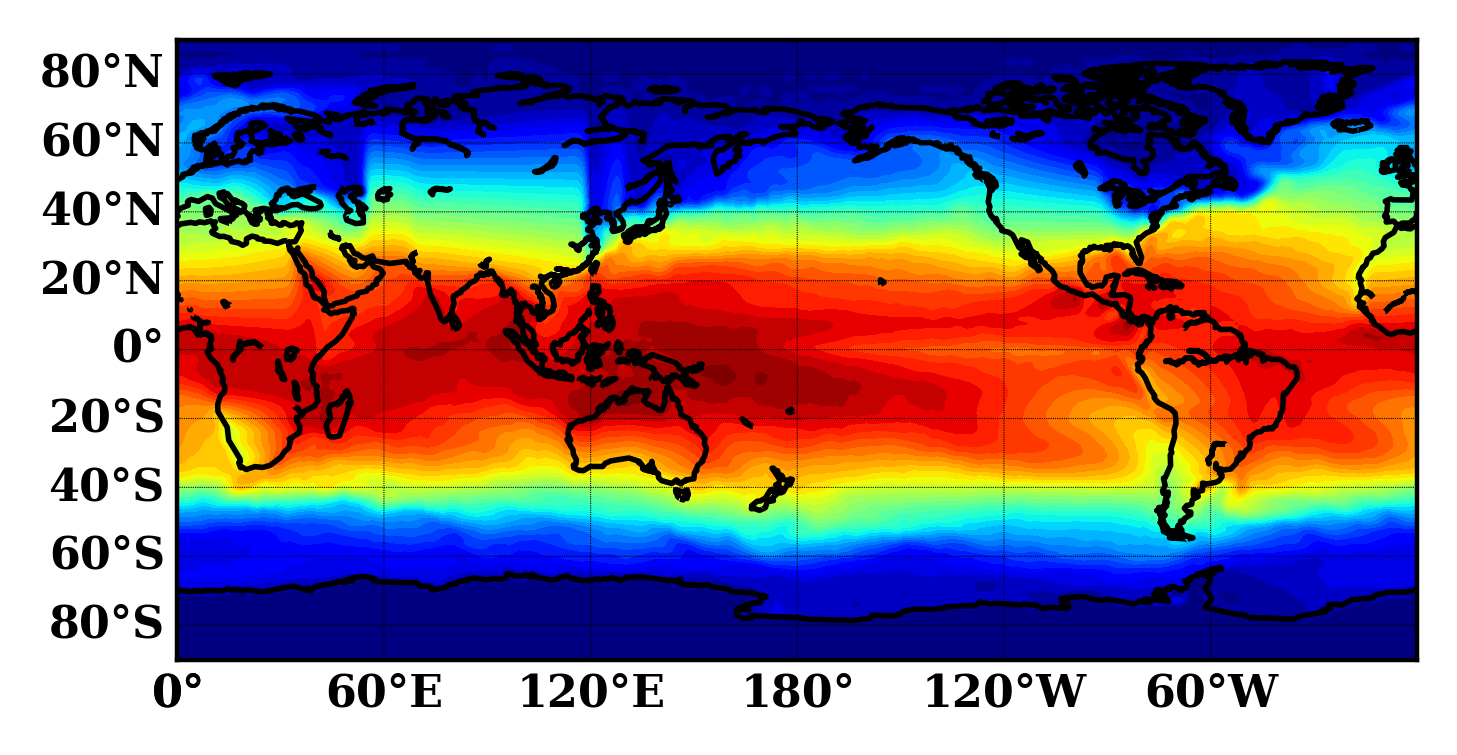

In [43]:
font = {'family': 'serif','weight': 'semibold','size': 8}
m = Basemap(llcrnrlon=0, llcrnrlat=-90, urcrnrlon=360, urcrnrlat=90)
levels = np.arange(np.nanmin(mean),np.nanmax(mean),1)

fig = plt.figure(figsize = (4, 4),dpi=400)
gs = GridSpec(1, 1)
gs.update(wspace=.1, hspace=0.4)

ax = fig.add_subplot(gs[0,0])
m.drawcoastlines(linewidth=1,ax=ax)
m.drawparallels(np.arange(-80, 81, 20), labels=[1,0,0,0], linewidth = 0.2,ax=ax,fontdict = font)
m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1], linewidth = 0.2,ax=ax,fontdict = font)
mean.plot.contourf(ax=ax, yincrease=True, levels=levels,
                          extend='both', add_colorbar=False,
                          add_labels=False, cmap='jet')

In [ ]:
# more properties to plot here: 
# http://xarray.pydata.org/en/stable/generated/xarray.plot.contourf.html


In [9]:
sst_season  = data['sst'].groupby('time.season').mean() # looking at the attributes

In [44]:
sst_season #season[n]#.shape

<xarray.DataArray 'sst' (season: 4, lat: 180, lon: 360)>
array([[[-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978],
        [-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978],
        [-1.7839811, -1.7821165, -1.7815233, ..., -1.7891505,
         -1.7891505, -1.788981 ],
        ...,
        [-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978],
        [-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978],
        [-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978]],

       [[-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978],
        [-1.7899978, -1.7899978, -1.7899978, ..., -1.7899978,
         -1.7899978, -1.7899978],
        [-1.7570066, -1.7553825, -1.7552115, ..., -1.7607679,
         -1.7608533, -1.7601695],
        ...,
        [-1.7899978, -1.7899978, -1.7899978, ..., -

/home/disk/p/yakelynr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


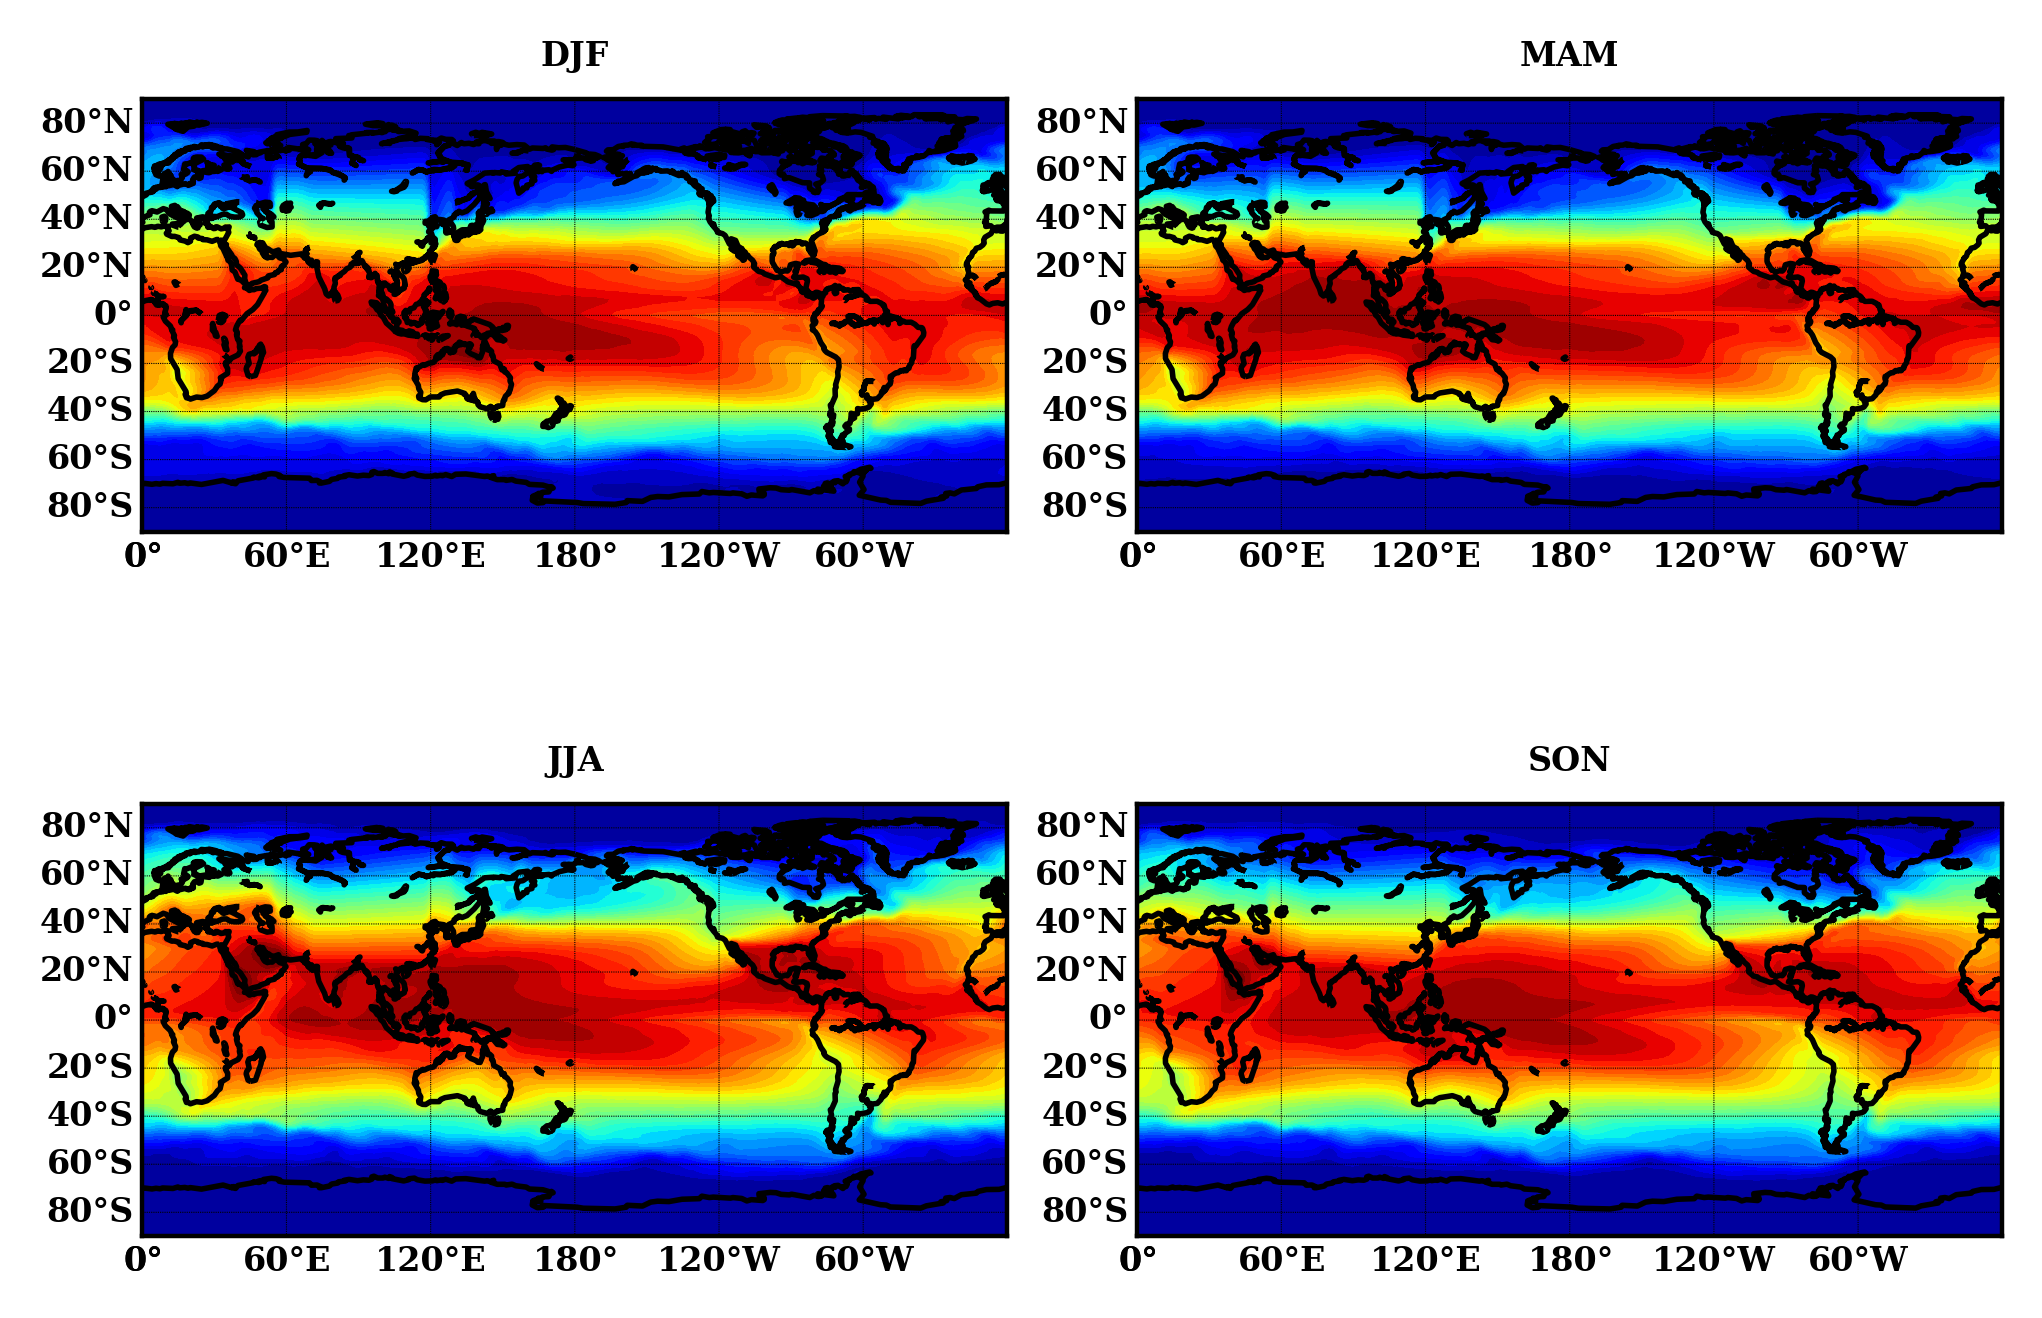

In [48]:
font = {'family': 'serif','weight': 'semibold','size': 6}
m = Basemap(llcrnrlon=0, llcrnrlat=-90, urcrnrlon=360, urcrnrlat=90)
levels = np.arange(np.nanmin(mean),np.nanmax(mean),1)

fig = plt.figure(figsize = (6, 4),dpi=400)
gs = GridSpec(2, 2)
gs.update(wspace=.15, hspace=0.4)
for n in range(4):
    if n < 2: 
        ax = fig.add_subplot(gs[n,0])
        m.drawcoastlines(linewidth=1,ax=ax)
        m.drawparallels(np.arange(-80, 81, 20), labels=[1,0,0,0], linewidth = 0.2,ax=ax,fontdict = font)
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1], linewidth = 0.2,ax=ax,fontdict = font)
        sst_season[n].plot.contourf(ax=ax, yincrease=True, levels=levels,
                                  extend='both', add_colorbar=False,
                                  add_labels=False, cmap='jet')
        ax.set_title(str(sst_season.season[n])[-4:-1], fontdict = font)
    else: 
        ax = fig.add_subplot(gs[n-2,1])
        m.drawcoastlines(linewidth=1,ax=ax)
        m.drawparallels(np.arange(-80, 81, 20), labels=[1,0,0,0], linewidth = 0.2,ax=ax,fontdict = font)
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1], linewidth = 0.2,ax=ax,fontdict = font)
        sst_season[n].plot.contourf(ax=ax, yincrease=True, levels=levels,
                                  extend='both', add_colorbar=False,
                                  add_labels=False, cmap='jet')
        ax.set_title(str(sst_season.season[n])[-4:-1], fontdict = font)
    

# Timeseries 

In [94]:
n34  = data['sst'].sel(lat=slice(5,-5),lon=slice(190,240)).mean(dim='lat').mean(dim='lon')

In [103]:
n34r10years = n34.rolling(time=12*10,min_periods=1,center=True).mean(dim='time')

In [123]:
clim    = n34.groupby('time.month').mean() 
clim.month 


<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

array([11])

In [126]:
n34anom = np.squeeze([ n34[n] - clim[np.where(n34[n].time.dt.month == clim.month)[0]]  for n,t in enumerate(n34.time.dt.month)])

In [95]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

months = mdates.YearLocator(10)
fmt = mdates.DateFormatter('%Y')

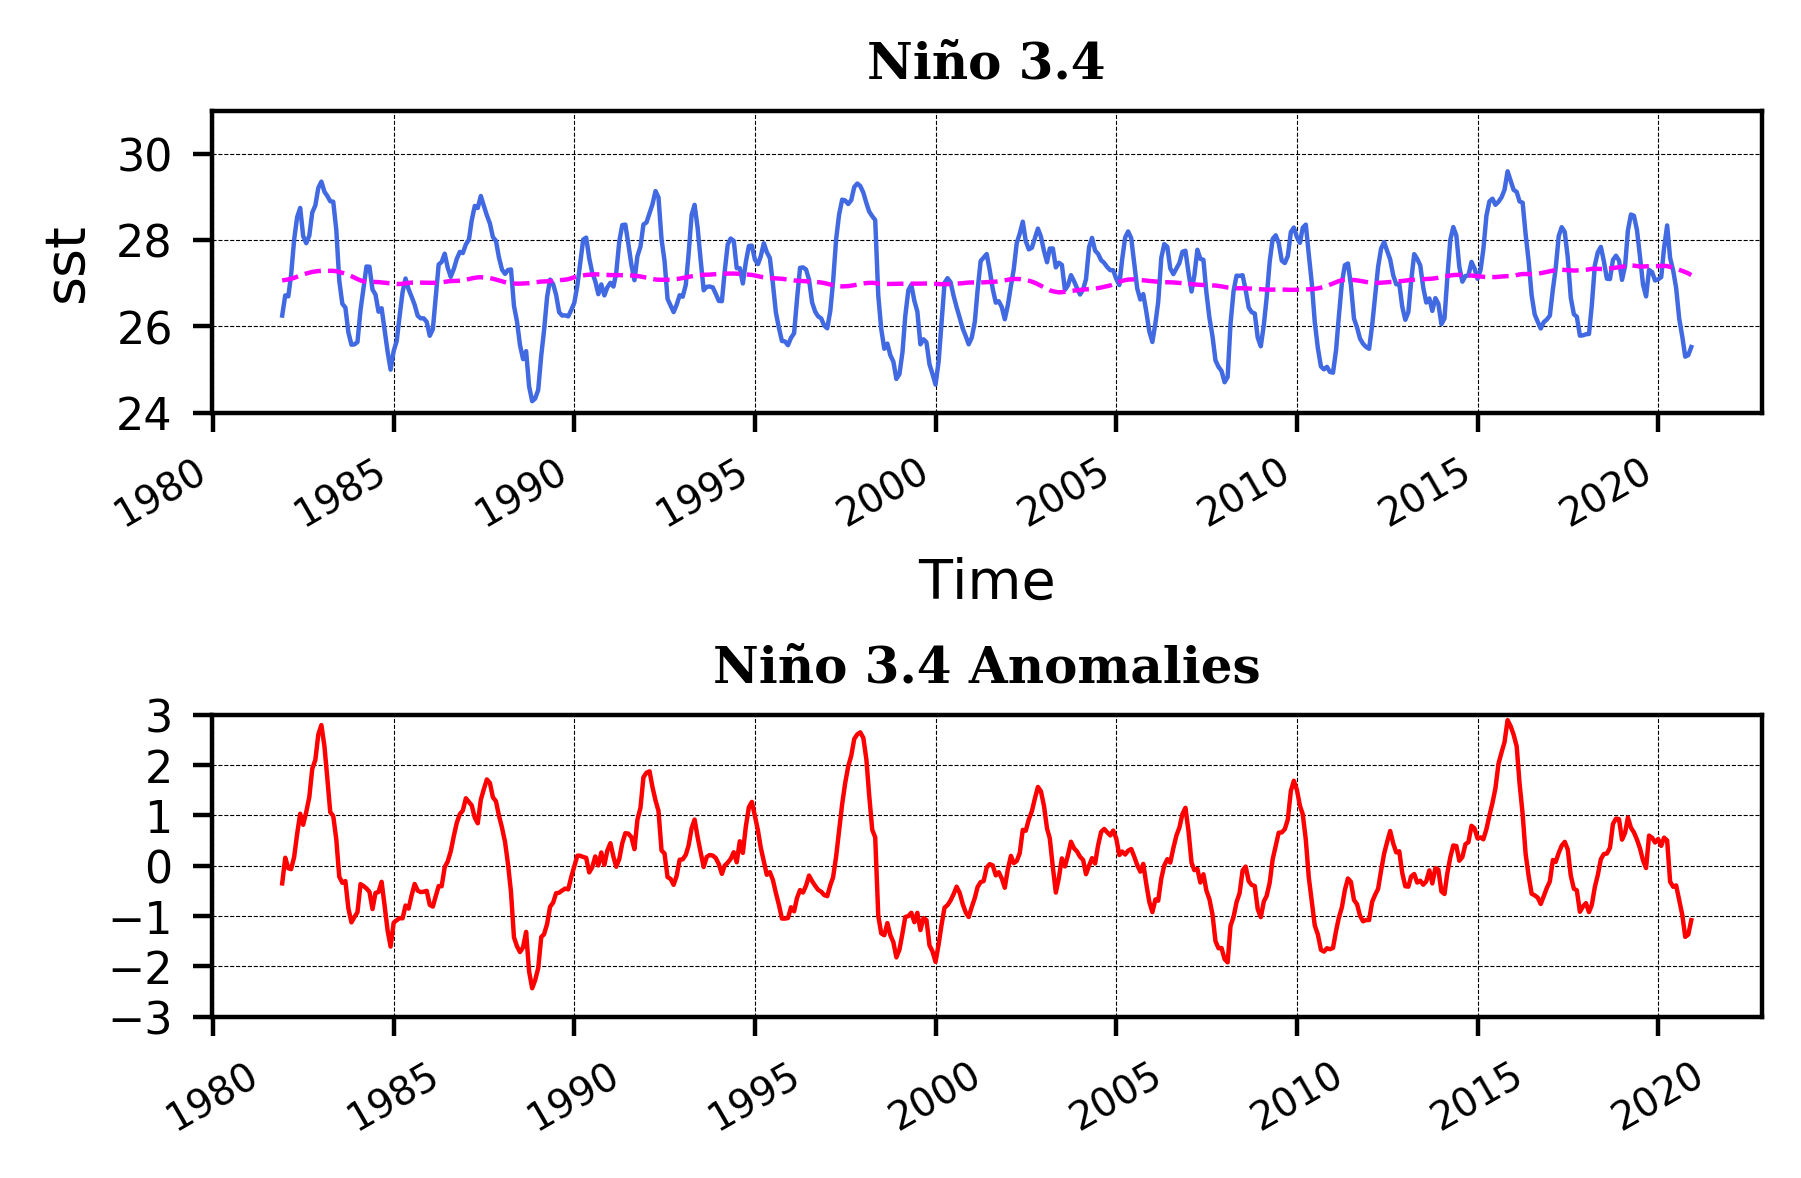

In [133]:
fig = plt.figure(figsize = (5, 3),dpi=400)
gs = GridSpec(2, 1)
gs.update(wspace=.15, hspace=1)

ax = fig.add_subplot(gs[0,0])
color = 'royalblue'
n34.plot(ax=ax, yincrease=True, linestyle = '-',color = color,lw = 0.8,label='Niño3.4')
color = 'fuchsia'
ax.plot(n34r10years.time,n34r10years,linestyle = '--',color = color,lw = 0.8,label='smoothed')

ax.yaxis.set_major_locator(months)
#ax.set_xlim(endTime,startTime)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt)) 
ax.set_title('Niño 3.4',fontdict=font,size = 9)

ax.set_ylim(24,31)
ax.set_yticks(np.arange(24,31,2))  
ax.xaxis.set_tick_params(labelsize=5,rotation=30)
ax.grid(axis='both', linestyle='--', color='k', linewidth=0.2)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=8)


ax = fig.add_subplot(gs[1,0])
color = 'red'
ax.plot(n34.time,n34anom,linestyle = '-',color = color,lw = 0.8,label='ANOM')

ax.yaxis.set_major_locator(months)
#ax.set_xlim(endTime,startTime)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt)) 
ax.set_title('Niño 3.4 Anomalies',fontdict=font,size = 9)

ax.set_ylim(-3,3)
ax.set_yticks(np.arange(-3,3.1,1))  
ax.xaxis.set_tick_params(labelsize=5,rotation=30)
ax.grid(axis='both', linestyle='--', color='k', linewidth=0.2)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=8)

